In [6]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from prettytable import PrettyTable
from matplotlib import pyplot as plt

import time

In [2]:
import os
import cv2

def extract_frames(video_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through each video file in the folder
    for filename in os.listdir(video_folder):
        if filename.endswith(".mp4") or filename.endswith(".avi"):
            video_path = os.path.join(video_folder, filename)
            video_name = os.path.splitext(filename)[0]

            # Create a subfolder for each video
            video_output_folder = os.path.join(output_folder, video_name)
            if not os.path.exists(video_output_folder):
                os.makedirs(video_output_folder)

            # Open the video file
            cap = cv2.VideoCapture(video_path)
            frame_count = 0

            # Read and process each frame
            while(cap.isOpened()):
                ret, frame = cap.read()
                if not ret:
                    break
                
                # Perform your processing here to identify words and numbers in the frame
                # For simplicity, let's just save every 16th frame
                if frame_count % 16 == 0:
                    output_frame_path = os.path.join(video_output_folder, f"{video_name}_frame_{frame_count}.jpg")
                    cv2.imwrite(output_frame_path, frame)

                frame_count += 1

            cap.release()

# Example usage:
video_dataset_folder = "D:\\FINAL YEAR PROJECT\\Dataset2.0"
output_frames_folder = "D:\\FINAL YEAR PROJECT\\Frames"
extract_frames(video_dataset_folder, output_frames_folder)


# ResNet50

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 400
NUM_CLASSES = 17
TRAIN_DATA_DIR = "D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Frames"

# Define data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and preprocess the data with splitting
train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # 80% of the data will be used for training
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # 20% of the data will be used for validation
)


Found 127 images belonging to 17 classes.
Found 22 images belonging to 17 classes.


In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 400
NUM_CLASSES = 17
TRAIN_DATA_DIR = "D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Frames"

# Define data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and preprocess the data
train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 127 images belonging to 17 classes.
Found 22 images belonging to 17 classes.


In [5]:

# Define the ResNet50 model
model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Add new layers to the model
x = model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Combine the original model with the new layers
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Start the timer
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Stop the timer
end_time = time.time()

# Compute the computational time
comp_time = end_time - start_time

# Evaluate the model
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

model.save('Resnet50_final.h5')

print(f'Training Accuracy: {train_acc * 100}')
print(f'Validation Accuracy: {val_acc * 100}')
print(f'Trainig time: {comp_time}')





Epoch 1/400


7/7 [==============================] - 38s 3s/step - loss: 18.7982 - accuracy: 0.1171 - val_loss: 7414.9580 - val_accuracy: 0.1250
Epoch 2/400
7/7 [==============================] - 21s 3s/step - loss: 4.5321 - accuracy: 0.2342 - val_loss: 52320.2227 - val_accuracy: 0.0625
Epoch 3/400
7/7 [==============================] - 21s 3s/step - loss: 2.4217 - accuracy: 0.3304 - val_loss: 279950.8750 - val_accuracy: 0.0625
Epoch 4/400
7/7 [==============================] - 22s 3s/step - loss: 2.0499 - accuracy: 0.3661 - val_loss: 264508.8125 - val_accuracy: 0.0625
Epoch 5/400
7/7 [==============================] - 21s 3s/step - loss: 1.9016 - accuracy: 0.4144 - val_loss: 89966.4062 - val_accuracy: 0.0625
Epoch 6/400
7/7 [==============================] - 21s 3s/step - loss: 1.7756 - accuracy: 0.5225 - val_loss: 35858.0430 - val_accuracy: 0.1250
Epoch 7/400
7/7 [==============================] - 21s 3s/step - loss: 1.6497 - accuracy: 0.4775 - val_loss: 6242.4741 - val_accuracy: 

KeyboardInterrupt: 

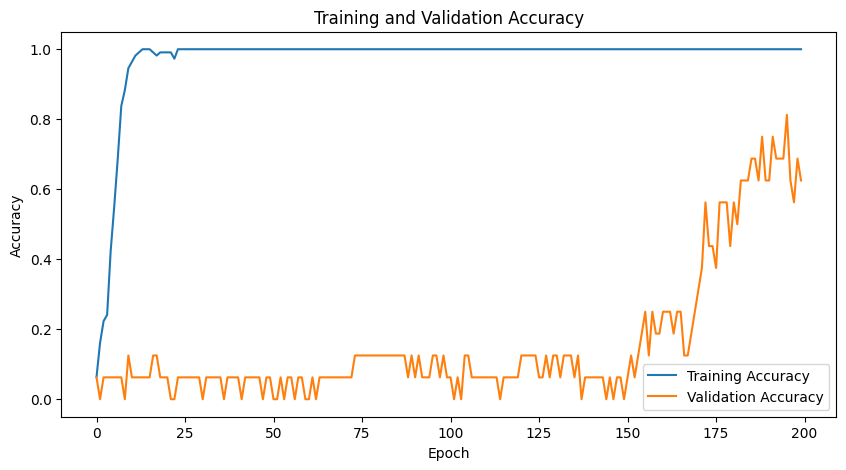

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

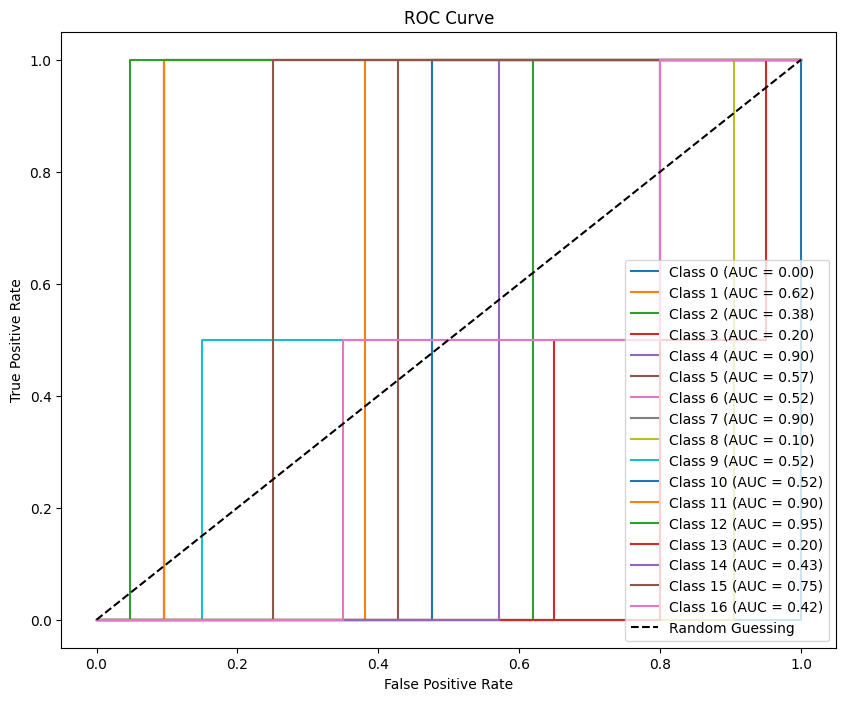

In [7]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


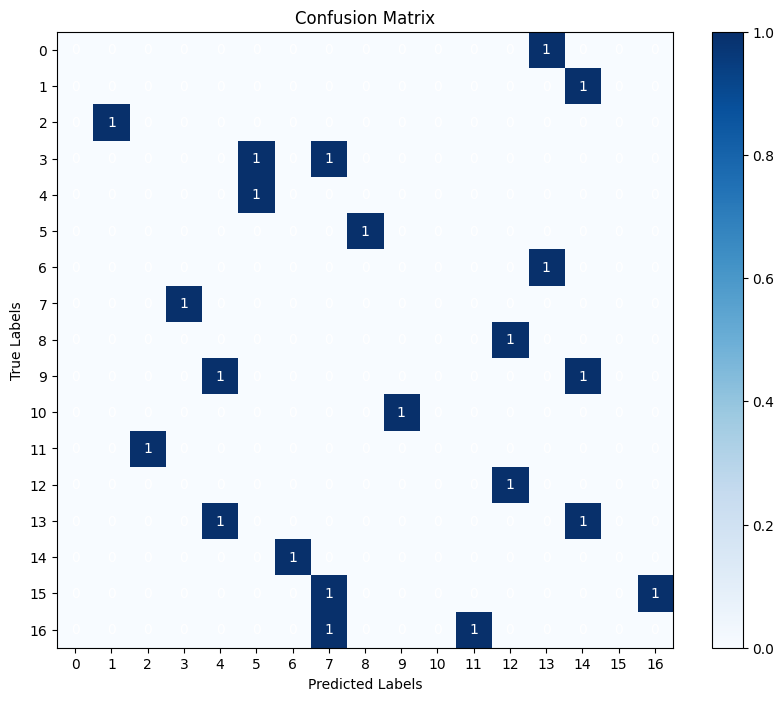

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(NUM_CLASSES))
plt.yticks(np.arange(NUM_CLASSES))
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
# Evaluate the model
train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# True labels for training and validation sets
train_true_labels = train_generator.classes
validation_true_labels = validation_generator.classes

# Calculate metrics
train_report = classification_report(train_true_labels, train_pred_labels, target_names=train_generator.class_indices)
validation_report = classification_report(validation_true_labels, validation_pred_labels, target_names=validation_generator.class_indices)

# Create PrettyTable for training metrics
train_table = PrettyTable()
train_table.field_names = ["Metric", "Precision", "Recall", "Sensitivity", "Specificity"]

print("Training Classification Report:")
print(train_report)

print("\nValidation Classification Report:")
print(validation_report)

# Additional metrics using confusion matrix
train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
validation_conf_matrix = confusion_matrix(validation_true_labels, validation_pred_labels)

# Calculate precision, recall, sensitivity, specificity
train_precision = np.diag(train_conf_matrix) / np.sum(train_conf_matrix, axis=0)
train_recall = np.diag(train_conf_matrix) / np.sum(train_conf_matrix, axis=1)
train_sensitivity = train_recall  # Sensitivity is the same as recall in binary classification
train_specificity = np.diag(train_conf_matrix) / (np.sum(train_conf_matrix) - np.sum(train_conf_matrix, axis=0))

validation_precision = np.diag(validation_conf_matrix) / np.sum(validation_conf_matrix, axis=0)
validation_recall = np.diag(validation_conf_matrix) / np.sum(validation_conf_matrix, axis=1)
validation_sensitivity = validation_recall  # Sensitivity is the same as recall in binary classification
validation_specificity = np.diag(validation_conf_matrix) / (np.sum(validation_conf_matrix) - np.sum(validation_conf_matrix, axis=0))

print("\nTraining Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training Sensitivity:", train_sensitivity)
print("Training Specificity:", train_specificity)

print("\nValidation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation Sensitivity:", validation_sensitivity)
print("Validation Specificity:", validation_specificity)

# Populate the table with training metrics
for class_name, precision, recall, sensitivity, specificity in zip(
        train_generator.class_indices.keys(),
        train_precision,
        train_recall,
        train_sensitivity,
        train_specificity
):
    train_table.add_row([class_name, precision, recall, sensitivity, specificity])

# Create PrettyTable for validation metrics
validation_table = PrettyTable()
validation_table.field_names = ["Metric", "Precision", "Recall", "Sensitivity", "Specificity"]

# Populate the table with validation metrics
for class_name, precision, recall, sensitivity, specificity in zip(
        validation_generator.class_indices.keys(),
        validation_precision,
        validation_recall,
        validation_sensitivity,
        validation_specificity
):
    validation_table.add_row([class_name, precision, recall, sensitivity, specificity])

# Print tables
print("Training Metrics:")
print(train_table)

print("\nValidation Metrics:")
print(validation_table)


Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.12      0.12      0.12         8
          10       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.25      0.25      0.25         8
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
         box       0.00      0.00      0.00         8
         fun       0.00      0.00      0.00         8
        good       0.22      0.22      0.22         9
        grow       0.00      0.00      0.00         8
        hero       0.12      0.12      0.12         8
       trust       0.00      0.00      0.00      

c:\Users\sumit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sumit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sumit\A

# ResNet Mobile

In [10]:
import tensorflow as tf
import time  # Import the time module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import MobileNetV2

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 400
NUM_CLASSES = 17
TRAIN_DATA_DIR = "D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Frames"

# Define data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and preprocess the data with splitting
train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # 80% of the data will be used for training
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # 20% of the data will be used for validation
)

# Define the MobileNetV2 model
base_model = MobileNetV2(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the layers in the base model
base_model.trainable = False

# Create new model on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Stop the timer
end_time = time.time()

# Compute the computational time
comp_time = end_time - start_time

# Evaluate the model
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

model.save('Resnetmobile.h5')

print(f'Training Accuracy: {train_acc * 100}')
print(f'Validation Accuracy: {val_acc * 100}')
print(f'Training time: {comp_time} seconds')


Found 127 images belonging to 17 classes.
Found 22 images belonging to 17 classes.


Epoch 1/400
7/7 [==============================] - 4s 218ms/step - loss: 13.1142 - accuracy: 0.1081 - val_loss: 13.3426 - val_accuracy: 0.1875
Epoch 2/400
7/7 [==============================] - 1s 74ms/step - loss: 9.1306 - accuracy: 0.1982 - val_loss: 6.1941 - val_accuracy: 0.1875
Epoch 3/400
7/7 [==============================] - 1s 73ms/step - loss: 4.1696 - accuracy: 0.3153 - val_loss: 4.7016 - val_accuracy: 0.0625
Epoch 4/400
7/7 [==============================] - 1s 70ms/step - loss: 1.7322 - accuracy: 0.4911 - val_loss: 3.3312 - val_accuracy: 0.2500
Epoch 5/400
7/7 [==============================] - 1s 71ms/step - loss: 1.7116 - accuracy: 0.4955 - val_loss: 3.0587 - val_accuracy: 0.3125
Epoch 6/400
7/7 [==============================] - 0s 68ms/step - loss: 1.3501 - accuracy: 0.5405 - val_loss: 2.7501 - val_accuracy: 0.4375
Epoch 7/400
7/7 [==============================] - 0s 69ms/step - loss: 1.1864 - accuracy: 0.6216 - val_loss: 2.6703 - val_accuracy: 0.3125
Epoch 8/400
7/7 [

c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Accuracy: 100.0
Validation Accuracy: 63.63636255264282
Training time: 224.13817501068115 seconds


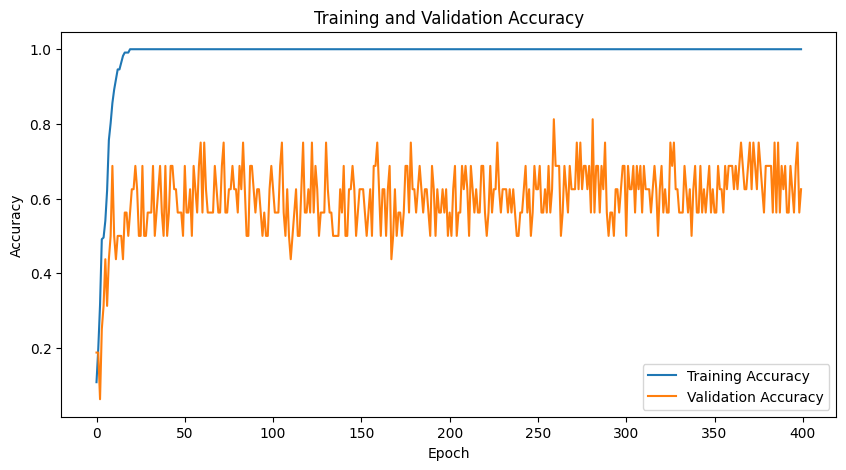

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 1s 34ms/step


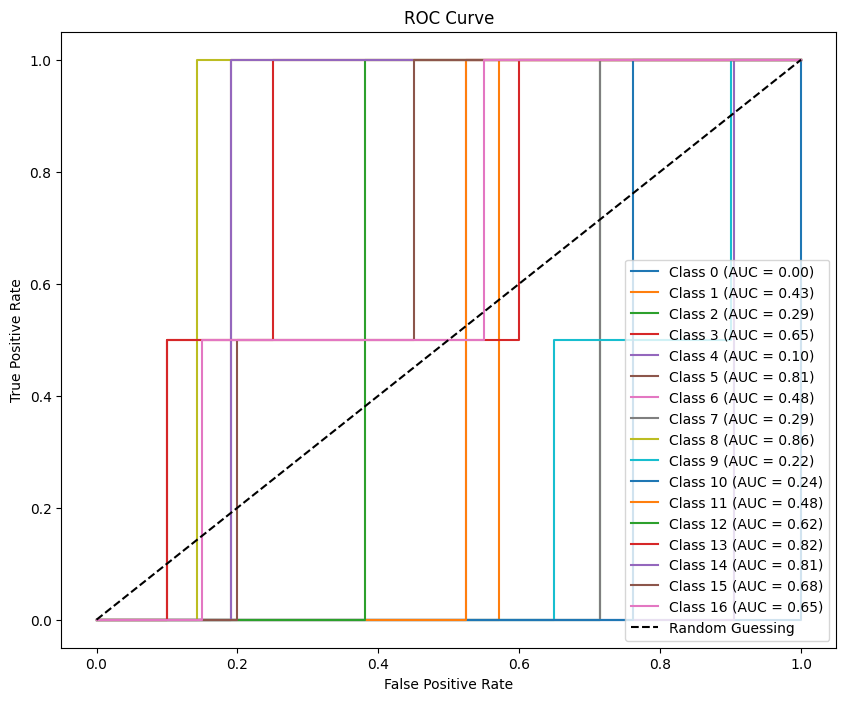

In [12]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


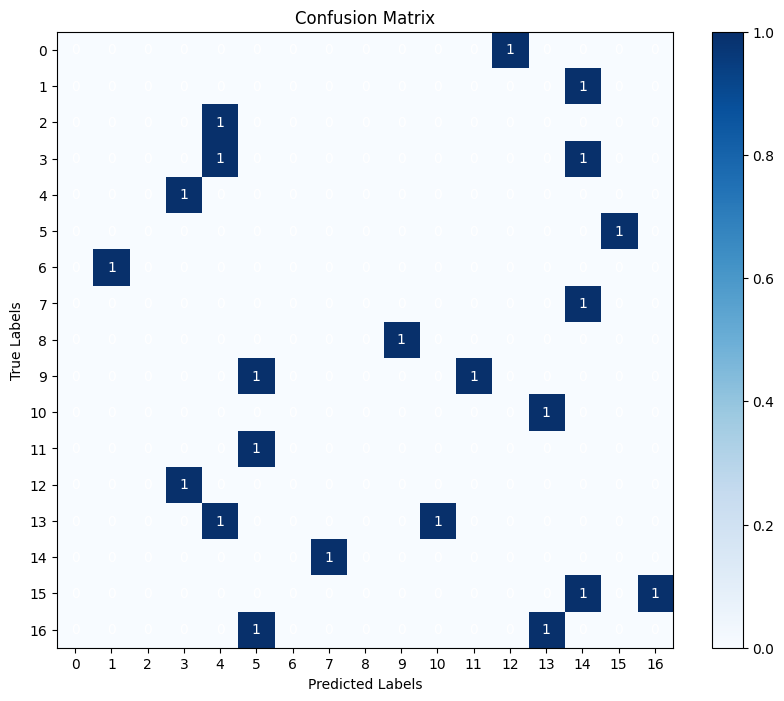

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(NUM_CLASSES))
plt.yticks(np.arange(NUM_CLASSES))
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [9]:
model.load_weights('D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Resnet&VGG\\Resnetmobile.h5')

ValueError: Layer count mismatch when loading weights from file. Model expected 108 layers, found 3 saved layers.

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
import pandas as pd
# Evaluate the model
train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# True labels for training and validation sets
train_true_labels = train_generator.classes
validation_true_labels = validation_generator.classes

# Calculate metrics
train_report = classification_report(train_true_labels, train_pred_labels, target_names=train_generator.class_indices)
validation_report = classification_report(validation_true_labels, validation_pred_labels, target_names=validation_generator.class_indices)

# Create PrettyTable for training metrics
train_table = PrettyTable()
train_table.field_names = ["Metric", "Precision", "Recall", "Sensitivity", "Specificity"]

print("Training Classification Report:")
print(train_report)

print("\nValidation Classification Report:")
print(validation_report)

# Additional metrics using confusion matrix
train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
validation_conf_matrix = confusion_matrix(validation_true_labels, validation_pred_labels)

# Calculate precision, recall, sensitivity, specificity
train_precision = np.diag(train_conf_matrix) / np.sum(train_conf_matrix, axis=0)
train_recall = np.diag(train_conf_matrix) / np.sum(train_conf_matrix, axis=1)
train_sensitivity = train_recall  # Sensitivity is the same as recall in binary classification
train_specificity = np.diag(train_conf_matrix) / (np.sum(train_conf_matrix) - np.sum(train_conf_matrix, axis=0))

validation_precision = np.diag(validation_conf_matrix) / np.sum(validation_conf_matrix, axis=0)
validation_recall = np.diag(validation_conf_matrix) / np.sum(validation_conf_matrix, axis=1)
validation_sensitivity = validation_recall  # Sensitivity is the same as recall in binary classification
validation_specificity = np.diag(validation_conf_matrix) / (np.sum(validation_conf_matrix) - np.sum(validation_conf_matrix, axis=0))

print("\nTraining Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training Sensitivity:", train_sensitivity)
print("Training Specificity:", train_specificity)

print("\nValidation Precision:", validation_precision)
print("Validation Recall:", validation_recall)
print("Validation Sensitivity:", validation_sensitivity)
print("Validation Specificity:", validation_specificity)

# Populate the table with training metrics
for class_name, precision, recall, sensitivity, specificity in zip(
        train_generator.class_indices.keys(),
        train_precision,
        train_recall,
        train_sensitivity,
        train_specificity
):
    train_table.add_row([class_name, precision, recall, sensitivity, specificity])

# Create PrettyTable for validation metrics
validation_table = PrettyTable()
validation_table.field_names = ["Metric", "Precision", "Recall", "Sensitivity", "Specificity"]

# Populate the table with validation metrics
for class_name, precision, recall, sensitivity, specificity in zip(
        validation_generator.class_indices.keys(),
        validation_precision,
        validation_recall,
        validation_sensitivity,
        validation_specificity
):
    validation_table.add_row([class_name, precision, recall, sensitivity, specificity])

# Print tables
print("Training Metrics:")
print(train_table)

print("\nValidation Metrics:")
print(validation_table)

# ... (your existing code)

# Create DataFrames for training and validation metrics
train_df = pd.DataFrame({
    'Dataset': 'Training',
    'Class': list(train_generator.class_indices.keys()),
    'Precision': train_precision,
    'Recall': train_recall,
    'Sensitivity': train_sensitivity,
    'Specificity': train_specificity
})

validation_df = pd.DataFrame({
    'Dataset': 'Validation',
    'Class': list(validation_generator.class_indices.keys()),
    'Precision': validation_precision,
    'Recall': validation_recall,
    'Sensitivity': validation_sensitivity,
    'Specificity': validation_specificity
})

# Concatenate DataFrames
combined_df = pd.concat([train_df, validation_df], ignore_index=True)

# Save combined DataFrame to an Excel sheet
combined_excel_path = 'resnetmobile.xlsx'
combined_df.to_excel(combined_excel_path, index=False)

print(f"Combined metrics saved to {combined_excel_path}")


2/2 [==============================] - 0s 30ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.14      0.14         7
           1       0.12      0.12      0.12         8
          10       0.00      0.00      0.00         6
           2       0.11      0.11      0.11         9
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         8
           5       0.33      0.33      0.33         6
           6       0.17      0.17      0.17         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
         box       0.12      0.12      0.12         8
         fun       0.00      0.00      0.00         8
        good       0.00      0.00      0.00         9
        grow       0.00      0.00      0.00         8
        hero       0.00      0.00      0.00        

c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Combined metrics saved to resnetmobile.xlsx


# ResNet Mobile & VGG-16

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.optimizers import Adam

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 400
NUM_CLASSES = 17
TRAIN_DATA_DIR = "D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Frames"

# Define data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and preprocess the data with splitting
train_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # 80% of the data will be used for training
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # 20% of the data will be used for validation
)

# Define the MobileNetV2 model
mobilenet_model = MobileNetV2(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                              include_top=False,
                              weights='imagenet')

# Define the VGG16 model
vgg16_model = VGG16(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                    include_top=False,
                    weights='imagenet')

# Freeze the layers in both base models
mobilenet_model.trainable = False
vgg16_model.trainable = False

# Define input layer
input_layer = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Obtain outputs from both models
mobilenet_output = mobilenet_model(input_layer)
vgg16_output = vgg16_model(input_layer)

# Flatten the outputs
mobilenet_flatten = Flatten()(mobilenet_output)
vgg16_flatten = Flatten()(vgg16_output)

# Concatenate the outputs
concatenated = Concatenate()([mobilenet_flatten, vgg16_flatten])

# Add dense layers for classification
x = Dense(128, activation='relu')(concatenated)
output_layer = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
combined_model.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = combined_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
train_loss, train_acc = combined_model.evaluate(train_generator)
val_loss, val_acc = combined_model.evaluate(validation_generator)

# Save the model
combined_model.save('resnet_vgg_combined.h5')

print(f'Training Accuracy: {train_acc * 100}')
print(f'Validation Accuracy: {val_acc * 100}')


Found 127 images belonging to 17 classes.
Found 22 images belonging to 17 classes.


Epoch 1/400
7/7 [==============================] - 6s 480ms/step - loss: 19.8474 - accuracy: 0.0901 - val_loss: 20.9539 - val_accuracy: 0.1250
Epoch 2/400
7/7 [==============================] - 2s 311ms/step - loss: 12.1484 - accuracy: 0.1982 - val_loss: 9.6006 - val_accuracy: 0.1250
Epoch 3/400
7/7 [==============================] - 2s 319ms/step - loss: 4.8461 - accuracy: 0.2613 - val_loss: 5.0792 - val_accuracy: 0.1250
Epoch 4/400
7/7 [==============================] - 2s 336ms/step - loss: 2.6387 - accuracy: 0.3571 - val_loss: 3.8715 - val_accuracy: 0.1250
Epoch 5/400
7/7 [==============================] - 3s 359ms/step - loss: 1.9003 - accuracy: 0.3333 - val_loss: 2.7678 - val_accuracy: 0.1250
Epoch 6/400
7/7 [==============================] - 2s 315ms/step - loss: 1.6191 - accuracy: 0.4414 - val_loss: 2.5231 - val_accuracy: 0.1875
Epoch 7/400
7/7 [==============================] - 2s 322ms/step - loss: 1.3788 - accuracy: 0.5856 - val_loss: 2.9783 - val_accuracy: 0.1875
Epoch 8/40

c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training Accuracy: 100.0
Validation Accuracy: 54.54545617103577


In [22]:
print(f'Training time: {comp_time} seconds')

Training time: 207.30106019973755 seconds


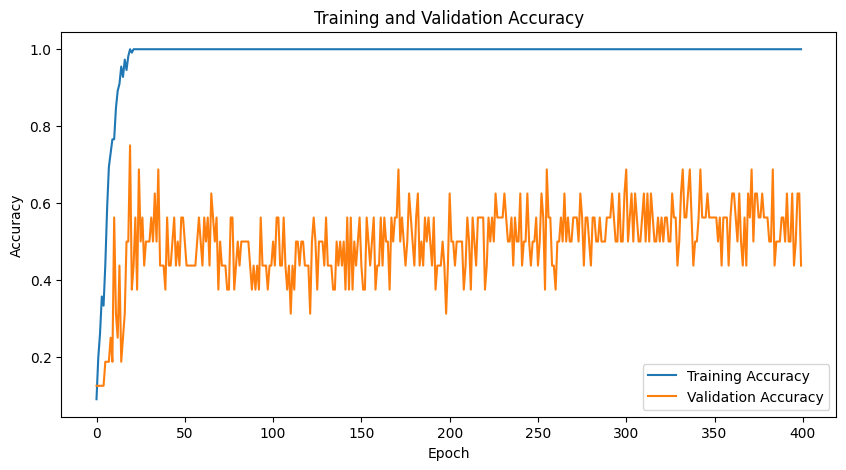

In [14]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 28ms/step


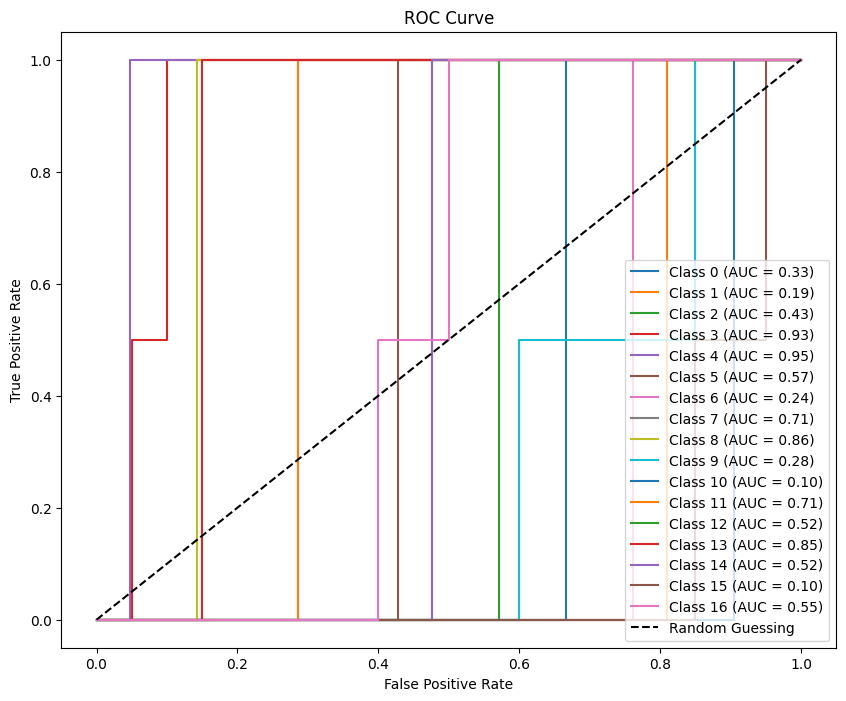

In [15]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


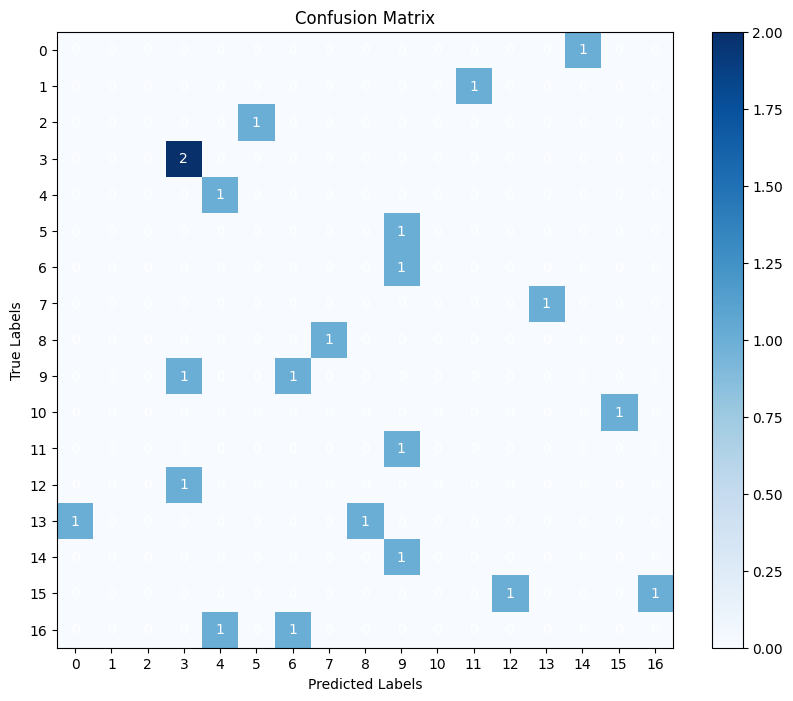

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(NUM_CLASSES))
plt.yticks(np.arange(NUM_CLASSES))
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [15]:
model.load_weights('D:\\New Dataset Lip Movement Projec\\FINAL YEAR PROJECT\\Resnet&VGG\\resnet_vgg_combined.h5')

ValueError: Layer count mismatch when loading weights from file. Model expected 3 layers, found 4 saved layers.

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from prettytable import PrettyTable
import pandas as pd

# Assuming you already have the necessary variables defined in your code
train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# True labels for training and validation sets
train_true_labels = train_generator.classes
validation_true_labels = validation_generator.classes

# Calculate metrics
train_report = classification_report(train_true_labels, train_pred_labels, target_names=train_generator.class_indices)
validation_report = classification_report(validation_true_labels, validation_pred_labels, target_names=validation_generator.class_indices)

# Additional metrics using confusion matrix
train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
validation_conf_matrix = confusion_matrix(validation_true_labels, validation_pred_labels)

# Calculate precision, recall, F1 score, and support
train_precision, train_recall, train_f1_score, train_support = precision_recall_fscore_support(train_true_labels, train_pred_labels)
validation_precision, validation_recall, validation_f1_score, validation_support = precision_recall_fscore_support(validation_true_labels, validation_pred_labels)

# Create PrettyTable for training metrics
train_table = PrettyTable()
train_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with training metrics
for class_name, precision, recall, f1_score, support in zip(
        train_generator.class_indices.keys(),
        train_precision,
        train_recall,
        train_f1_score,
        train_support
):
    train_table.add_row([class_name, precision, recall, f1_score, support])

# Create PrettyTable for validation metrics
validation_table = PrettyTable()
validation_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with validation metrics
for class_name, precision, recall, f1_score, support in zip(
        validation_generator.class_indices.keys(),
        validation_precision,
        validation_recall,
        validation_f1_score,
        validation_support
):
    validation_table.add_row([class_name, precision, recall, f1_score, support])

# Print tables
print("Training Metrics:")
print(train_table)

print("\nValidation Metrics:")
print(validation_table)

# ... (your existing code)

# Create DataFrames for training and validation metrics
train_df = pd.DataFrame({
    'Dataset': 'Training',
    'Class': list(train_generator.class_indices.keys()),
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1_score,
    'Support': train_support
})

validation_df = pd.DataFrame({
    'Dataset': 'Validation',
    'Class': list(validation_generator.class_indices.keys()),
    'Precision': validation_precision,
    'Recall': validation_recall,
    'F1 Score': validation_f1_score,
    'Support': validation_support
})

# Concatenate DataFrames
combined_df = pd.concat([train_df, validation_df], ignore_index=True)

# Save combined DataFrame to an Excel sheet
combined_excel_path = 'combined_metrics.xlsx'
combined_df.to_excel(combined_excel_path, index=False)

print(f"Combined metrics saved to {combined_excel_path}")


2/2 [==============================] - 0s 40ms/step
Training Metrics:
+-------+---------------------+---------------------+---------------------+---------+
| Class |      Precision      |        Recall       |       F1 Score      | Support |
+-------+---------------------+---------------------+---------------------+---------+
|   0   | 0.14285714285714285 | 0.14285714285714285 | 0.14285714285714285 |    7    |
|   1   |         0.0         |         0.0         |         0.0         |    8    |
|   10  | 0.16666666666666666 | 0.16666666666666666 | 0.16666666666666666 |    6    |
|   2   |  0.1111111111111111 |  0.1111111111111111 |  0.1111111111111111 |    9    |
|   3   |         0.0         |         0.0         |         0.0         |    7    |
|   4   |         0.0         |         0.0         |         0.0         |    8    |
|   5   |         0.0         |         0.0         |         0.0         |    6    |
|   6   |         0.0         |         0.0         |         0.0     

c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ksaqu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,